# Model validation currents

Note: this notebook requires the model output data

In [1]:
import modelskill as ms
import matplotlib.pyplot as plt
import helper as h

In [2]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"
mr_fn = f"{mr_fldr}Area.dfsu"

In [3]:
ulist, vlist = h.get_u_v_point_obs()

In [4]:
mr_u = ms.DfsuModelResult(mr_fn, name="MIKE21", item=1)
mr_v = ms.DfsuModelResult(mr_fn, name="MIKE21", item=2)
mr_u

<DfsuModelResult>: MIKE21
Time: 2014-01-01 00:00:00 - 2023-12-31 23:00:00
Quantity: u velocity component [m/s]

In [5]:
cc_u = ms.match(obs=ulist, mod=mr_u)
cc_v = ms.match(obs=vlist, mod=mr_v)

In [6]:
# Remove bias from comparers
cc2_u = []
cc2_v = []
for i in range(len(cc_u)):
    cc2_u.append(cc_u[i].remove_bias())
    cc2_v.append(cc_v[i].remove_bias())
cc_u = ms.ComparerCollection(cc2_u)
cc_v = ms.ComparerCollection(cc2_v)
cc_u

<ComparerCollection>
Comparers:
0: Drogden - u-current [m/s]
1: Flinten7 - u-current [m/s]
2: Helsingborg - u-current [m/s]

In [19]:
cc_u.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
Drogden,12817,-3.603439e-18,0.080691,0.080691,0.060943,0.924125,0.457001,0.849664
Flinten7,61574,-2.769517e-18,0.235013,0.235013,0.173981,0.510341,1.437732,-0.156051
Helsingborg,13895,0.000000e+00,0.093270,0.093270,0.065245,0.808826,0.915823,0.531910


In [20]:
cc_v.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
Drogden,12817,-4.712189e-18,0.091842,0.091842,0.070377,0.944490,0.396853,0.887624
Flinten7,61574,-6.462207e-18,0.206317,0.206317,0.151181,0.892415,0.564109,0.783888
Helsingborg,13895,-5.880706e-18,0.115120,0.115120,0.085464,0.872131,0.610530,0.754893


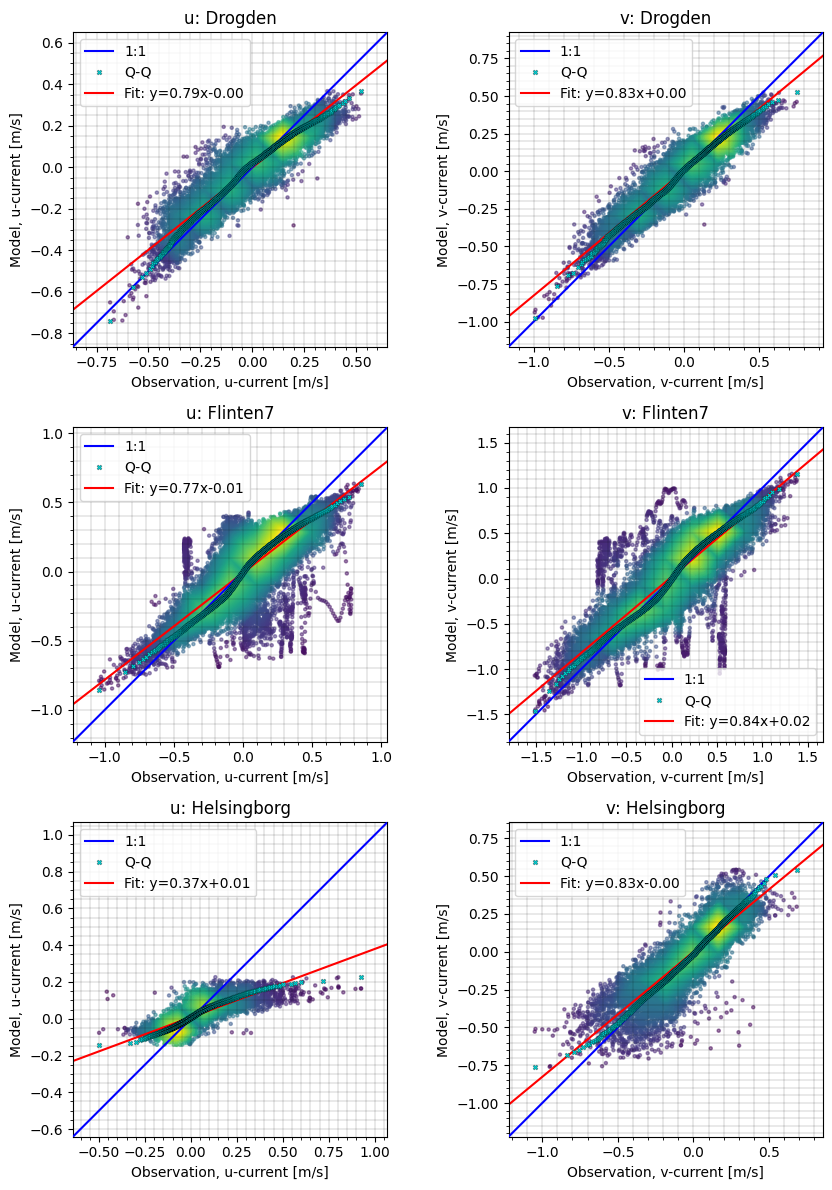

In [ ]:
yr_s = [None, None, None]
yr = ["2024","2020", "2019"]

fig,axs = plt.subplots(3,2,figsize=(9,12))
# Scatter plot using just the last year of data
for i in range(len(cc_u)):

    cc_u[i].sel(start = yr_s[i], end=yr[i]).plot.scatter(ax=axs[i,0],bins=10)
    cc_v[i].sel(start = yr_s[i], end=yr[i]).plot.scatter(ax=axs[i,1],bins=10)
    axs[i,0].set_title("u: "+cc_u[i].name)
    axs[i,1].set_title("v: "+cc_v[i].name)
plt.tight_layout()
plt.show()

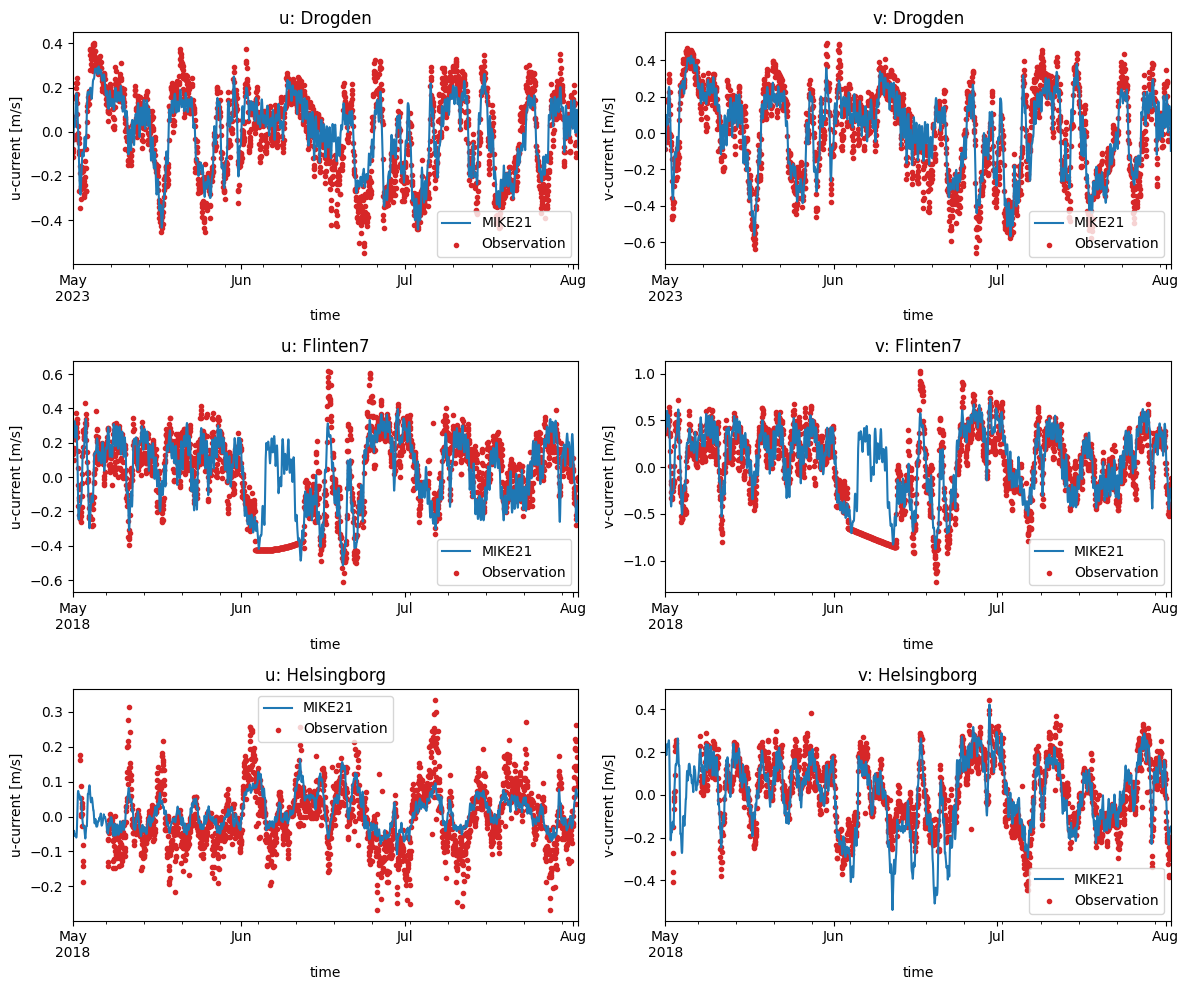

In [22]:
# Look at a timeseries for a qualitative comparison between observations and model
yr_s = ["2023-05-01", "2018-05-01", "2018-05-01"]
yr = ["2023-08-01","2018-08-01", "2018-08-01"]
fig,axs = plt.subplots(3,2,figsize=(12,10))
for i in range(len(cc_u)):
    cc_u[i].sel(time=slice(yr_s[i],yr[i])).plot.timeseries(ax=axs[i,0])
    cc_v[i].sel(time=slice(yr_s[i],yr[i])).plot.timeseries(ax=axs[i,1])
    axs[i,0].set_title("u: "+cc_u[i].name)
    axs[i,1].set_title("v: "+cc_v[i].name)
plt.tight_layout()
plt.show()

The plot shows that the MIKE21 model is close to the Drogden data, and the same goes for Flinten7. However, there are some artefacts in the observation data, e.g. in June, which is also reflected in the scatter plot. This is a main source of error when comparing the model to the data. 
In the Helsingborg station, the model is under-predicting the u-component of the current. The reason for this could be lack of calibration. 